In [1]:
dataset = 'macosko2015'
algorithm = 'ivis'
n_components =64
dims = (50,)


In [2]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [3]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### load packages

In [5]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/umap.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [7]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [8]:
import gzip
import pickle

with gzip.open(DATA_DIR / 'macosko_2015.pkl.gz', "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

def zero_one_norm(x):
    return (x- np.min(x, axis=0))/ (np.max(x, axis=0)-np.min(x, axis=0))

x_norm = zero_one_norm(x)

print("Data set contains %d samples with %d features" % x.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_norm, y, test_size=.1, random_state=42)

n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

X_train_flat = X_train
X_test_flat = X_test

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

Y_train = enc.fit_transform([[i] for i in Y_train]).flatten()
Y_test = enc.fit_transform([[i] for i in Y_test]).flatten()

Data set contains 44808 samples with 50 features


### Create model and train

In [9]:
from ivis import Ivis
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [10]:
from tensorflow.keras.layers import (
    Conv2D,
    Reshape,
    Bidirectional,
    Dense,
    RepeatVector,
    TimeDistributed,
    LSTM
)


In [11]:
X_train.shape

(30327, 50)

In [12]:
x_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(X_train_flat).reshape([len(X_train)] + list(dims))

In [13]:
# Set ivis parameters
model = Ivis(embedding_dims=n_components)

In [14]:
# Generate embeddings
embeddings =z = model.fit_transform(X_scaled)

 17%|█▋        | 5140/30327 [00:00<00:00, 51389.14it/s]

Building KNN index


100%|██████████| 30327/30327 [00:00<00:00, 68890.57it/s]


Extracting KNN neighbours


100%|█████████▉| 30299/30327 [00:03<00:00, 7765.69it/s] 


Training neural network
Epoch 1/1000
237/237 [==============================] - 1s 5ms/step - loss: 1.0619
Epoch 2/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.8988
Epoch 3/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.7501
Epoch 4/1000
237/237 [==============================] - 1s 4ms/step - loss: 0.6726
Epoch 5/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.6357
Epoch 6/1000
237/237 [==============================] - 1s 4ms/step - loss: 0.6188
Epoch 7/1000
237/237 [==============================] - 1s 4ms/step - loss: 0.5973
Epoch 8/1000
237/237 [==============================] - 1s 4ms/step - loss: 0.5842
Epoch 9/1000
237/237 [==============================] - 1s 4ms/step - loss: 0.5691
Epoch 10/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.5597
Epoch 11/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.5467
Epoch 12/1000
237/237 [==============================] - 1s 6

237/237 [==============================] - 1s 6ms/step - loss: 0.2079
Epoch 99/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.2088
Epoch 100/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.2013
Epoch 101/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.2032
Epoch 102/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.1996
Epoch 103/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.1992
Epoch 104/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.1960
Epoch 105/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.1950
Epoch 106/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.1996
Epoch 107/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.1961
Epoch 108/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.1963
Epoch 109/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.2

237/237 [==============================] - 1s 4ms/step - loss: 0.1393
Epoch 195/1000
237/237 [==============================] - 1s 4ms/step - loss: 0.1375
Epoch 196/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.1396
Epoch 197/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.1386
Epoch 198/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.1412
Epoch 199/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.1397
Epoch 200/1000
237/237 [==============================] - 2s 6ms/step - loss: 0.1334
Epoch 201/1000
237/237 [==============================] - 2s 6ms/step - loss: 0.1375
Epoch 202/1000
237/237 [==============================] - 2s 6ms/step - loss: 0.1397
Epoch 203/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.1382
Epoch 204/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.1368
Epoch 205/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.

### Plot model output

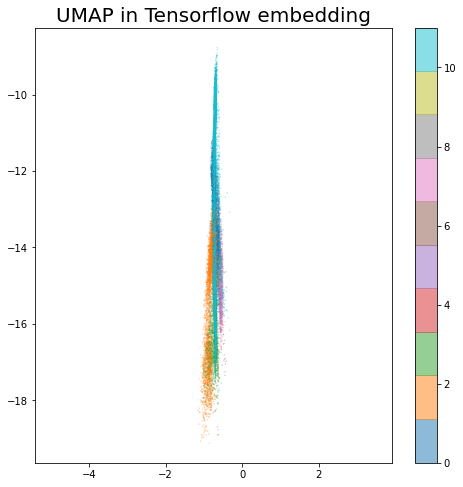

In [15]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save output

In [16]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [17]:
output_dir = MODEL_DIR/'projections'/ dataset / str(n_components) / algorithm
ensure_dir(output_dir)

In [18]:
#vae.save(output_dir)

In [19]:
model.save_model(output_dir / 'iris.ivis')

In [20]:
#loss_df.to_pickle(output_dir / 'loss_df.pickle')

In [21]:
np.save(output_dir / 'z.npy', z)

### compute metrics 

In [22]:
X_test.shape

(4481, 50)

In [23]:
z_test = model.transform(x_scaler.transform(X_test).reshape([len(X_test)]+ list(dims)))

36/36 [==============================] - 0s 2ms/step


#### silhouette

In [24]:
from tfumap.silhouette import silhouette_score_block

In [25]:
ss, sil_samp = silhouette_score_block(z, Y_train, n_jobs = -1)
ss

0.017811438562452122

In [26]:
ss_test, sil_samp_test = silhouette_score_block(z_test, Y_test, n_jobs = -1)
ss_test

0.005928262534413193

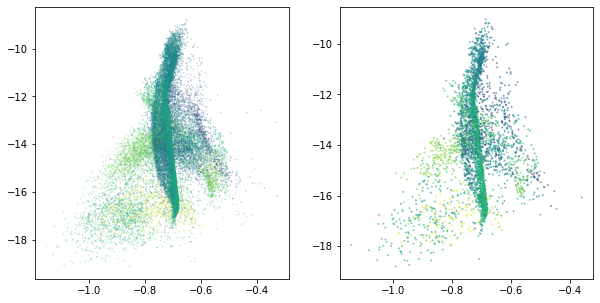

In [27]:
fig, axs = plt.subplots(ncols = 2, figsize=(10, 5))
axs[0].scatter(z[:, 0], z[:, 1], s=0.1, alpha=0.5, c=sil_samp, cmap=plt.cm.viridis)
axs[1].scatter(z_test[:, 0], z_test[:, 1], s=1, alpha=0.5, c=sil_samp_test, cmap=plt.cm.viridis)

#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(z, Y_train)
score_5nn = neigh5.score(z_test, Y_test)
score_5nn

0.9654095068065164

In [30]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(z, Y_train)
score_1nn = neigh1.score(z_test, Y_test)
score_1nn

0.9538049542512832

#### Trustworthiness

In [31]:
from sklearn.manifold import trustworthiness

In [32]:
tw = trustworthiness(X_train_flat[:10000], z[:10000])

In [33]:
tw_test = trustworthiness(X_test_flat[:10000], z_test[:10000])

In [34]:
tw, tw_test

(0.9125640472377903, 0.9081557409621757)

### Save output metrics

In [35]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

#### train

In [36]:
metrics_df = pd.DataFrame(
    columns=[
        "dataset",
        "class_",
        "dim",
        "trustworthiness",
        "silhouette_score",
        "silhouette_samples",
    ]
)
metrics_df.loc[len(metrics_df)] = [dataset, algorithm, n_components, tw, ss, sil_samp]
metrics_df

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,macosko2015,ivis,64,0.912564,0.017811,"[-0.08945983357087404, 0.16246209108171947, 0...."


In [37]:
save_loc = DATA_DIR / 'projection_metrics' /  algorithm / 'train' / str(n_components) / (dataset + '.pickle')
ensure_dir(save_loc)
metrics_df.to_pickle(save_loc)

#### test

In [38]:
metrics_df_test = pd.DataFrame(
    columns=[
        "dataset",
        "class_",
        "dim",
        "trustworthiness",
        "silhouette_score",
        "silhouette_samples",
    ]
)
metrics_df_test.loc[len(metrics_df)] = [dataset, algorithm, n_components, tw_test, ss_test, sil_samp_test]
metrics_df_test

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
1,macosko2015,ivis,64,0.908156,0.005928,"[-0.09910465923415587, 0.26941199661148046, -0..."


In [39]:
save_loc = DATA_DIR / 'projection_metrics' / algorithm / 'test' / str(n_components) / (dataset + '.pickle')
ensure_dir(save_loc)
metrics_df.to_pickle(save_loc)

#### knn 

In [40]:
nn_acc_df = pd.DataFrame(columns = ["method_","dimensions","dataset","1NN_acc","5NN_acc"])
nn_acc_df.loc[len(nn_acc_df)] = [algorithm, n_components, dataset,  score_1nn, score_5nn]
nn_acc_df

,method_,dimensions,dataset,1NN_acc,5NN_acc
0,ivis,64,macosko2015,0.953805,0.96541


In [41]:
save_loc = DATA_DIR / 'knn_classifier' / algorithm / 'train' / str(n_components) / (dataset + '.pickle')
ensure_dir(save_loc)
nn_acc_df.to_pickle(save_loc)

### Compute clustering quality

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure

In [43]:
def get_cluster_metrics(row, n_init=5):
    
    # load cluster information
    save_loc = DATA_DIR / 'clustering_metric_df'/ ('_'.join([row.class_, str(row.dim), row.dataset]) + '.pickle')
    print(save_loc)
    if save_loc.exists() and save_loc.is_file():
        
        cluster_df = pd.read_pickle(save_loc)
        return cluster_df
    
    # make cluster metric dataframe
    cluster_df = pd.DataFrame(
        columns=[
            "dataset",
            "class_",
            "dim",
            "silhouette",
            "homogeneity",
            "completeness",
            "v_measure",
            "init_",
            "n_clusters",
            "model",
        ]
    )
    y = row.train_label
    z = row.train_z
    n_labels = len(np.unique(y))
    for n_clusters in tqdm(np.arange(n_labels - int(n_labels / 2), n_labels + int(n_labels / 2)), leave=False, desc = 'n_clusters'):
        for init_ in tqdm(range(n_init), leave=False, desc='init'):
            kmeans = KMeans(n_clusters=n_clusters, random_state=init_).fit(z)
            clustered_y = kmeans.labels_
            homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(
                np.array(y).flatten(), np.array(clustered_y).flatten()
            )
            ss, _ = silhouette_score_block(z, clustered_y)
            cluster_df.loc[len(cluster_df)] = [
                row.dataset,
                row.class_,
                row.dim,
                ss,
                homogeneity,
                completeness,
                v_measure,
                init_,
                n_clusters,
                kmeans,
            ]
    
     # save cluster df in case this fails somewhere
    ensure_dir(save_loc)
    cluster_df.to_pickle(save_loc)
    return cluster_df

In [44]:
projection_df = pd.DataFrame(columns = ['dataset', 'class_', 'train_z', 'train_label', 'dim'])
projection_df.loc[len(projection_df)] = [dataset, algorithm, z, Y_train, n_components]
projection_df

,dataset,class_,train_z,train_label,dim
0,macosko2015,ivis,"[[-0.7608659, -14.692816, 0.10751847, 3.083225...","[10.0, 7.0, 0.0, 10.0, 10.0, 10.0, 10.0, 10.0,...",64


In [45]:
get_cluster_metrics(projection_df.iloc[0], n_init=5)

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/clustering_metric_df/ivis_64_macosko2015.pickle


n_clusters:   0%|          | 0/12 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,macosko2015,ivis,64,0.350040,0.576754,0.382409,0.459893,0,6,"KMeans(n_clusters=6, random_state=0)"
1,macosko2015,ivis,64,0.351366,0.637799,0.430422,0.513981,1,6,"KMeans(n_clusters=6, random_state=1)"
2,macosko2015,ivis,64,0.351648,0.637692,0.430470,0.513981,2,6,"KMeans(n_clusters=6, random_state=2)"
3,macosko2015,ivis,64,0.349990,0.576904,0.382517,0.460018,3,6,"KMeans(n_clusters=6, random_state=3)"
4,macosko2015,ivis,64,0.351649,0.637572,0.430388,0.513883,4,6,"KMeans(n_clusters=6, random_state=4)"
5,macosko2015,ivis,64,0.371531,0.660852,0.407730,0.504312,0,7,"KMeans(n_clusters=7, random_state=0)"
6,macosko2015,ivis,64,0.371721,0.660272,0.407300,0.503814,1,7,"KMeans(n_clusters=7, random_state=1)"
7,macosko2015,ivis,64,0.371557,0.660798,0.407687,0.504263,2,7,"KMeans(n_clusters=7, random_state=2)"
8,macosko2015,ivis,64,0.371579,0.660473,0.407457,0.503992,3,7,"KMeans(n_clusters=7, random_state=3)"
9,macosko2015,ivis,64,0.370031,0.607169,0.376322,0.464653,4,7,"KMeans(n_clusters=7, random_state=4)"
